In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
from scipy.cluster.hierarchy import dendrogram, linkage

# Set seed for reproducibility
np.random.seed(42)

# TODO 1: Load the California Housing Dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)
housing_data = df[['Latitude', 'Longitude', 'MedInc']]
housing_data = housing_data.drop_duplicates()

# Split the dataset into train and test sets
train_data, test_data = train_test_split(housing_data, test_size=0.2, random_state=42)

# Standardize the training data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
train_data = pd.DataFrame(train_data_scaled, columns=['Latitude', 'Longitude', 'MedInc'])

# Standardize the test data using the same scaler
test_data_scaled = scaler.transform(test_data)
test_data = pd.DataFrame(test_data_scaled, columns=['Latitude', 'Longitude', 'MedInc'])

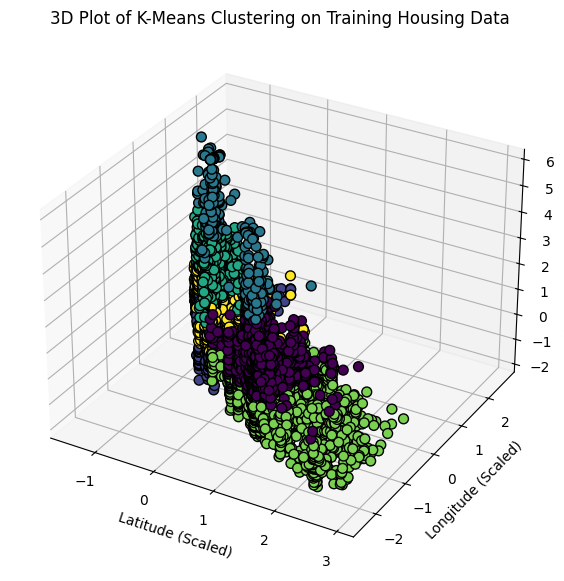

The 3D plot displays 6 distinct clusters of housing data based on Latitude, Longitude, and Median Income. Clusters seem to separate geographic areas with varying income levels


In [31]:
# TODO 2: Build a K-Means Model
kmeans_model = KMeans(n_clusters=6, random_state=42)
train_data['cluster'] = kmeans_model.fit_predict(train_data[['Latitude', 'Longitude', 'MedInc']])

# Plot the training clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data['Latitude'],
           train_data['Longitude'],
           train_data['MedInc'],
           c=train_data['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50, depthshade=False)
ax.set_title('3D Plot of K-Means Clustering on Training Housing Data')
ax.set_xlabel('Latitude (Scaled)')
ax.set_ylabel('Longitude (Scaled)')
ax.set_zlabel('Median Income (Scaled)')
plt.show()

# Description of the plot
print("The 3D plot displays 6 distinct clusters of housing data based on Latitude, Longitude, and Median Income. "
      "Clusters seem to separate geographic areas with varying income levels")

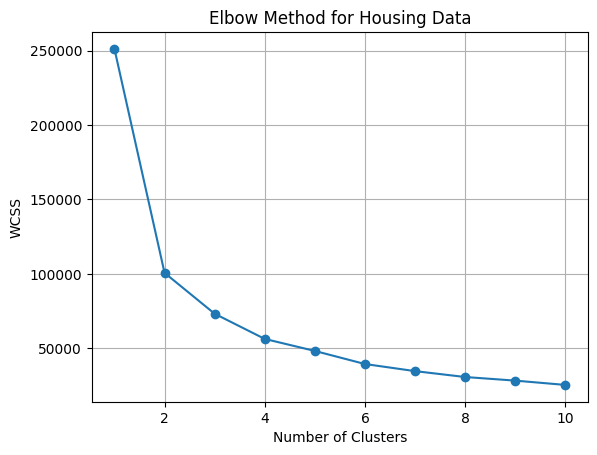

In [32]:
#TODO: Elbow Method to Determine Optimal Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(housing_data[['Latitude', 'Longitude', 'MedInc']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Housing Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
#TODO: Hierarchical Clustering and Dendrogram
Z = linkage(housing_data[['Latitude', 'Longitude', 'MedInc']], method='ward')
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

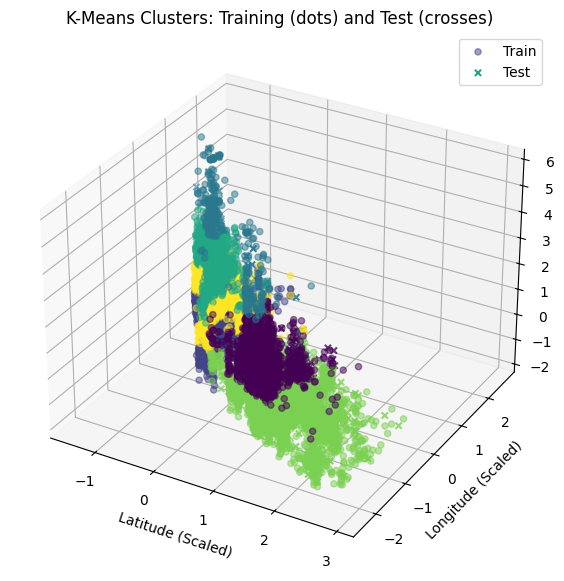

In [ ]:
# TODO 3: Predict with the Test Set
test_data['cluster'] = kmeans_model.predict(test_data[['Latitude', 'Longitude', 'MedInc']])

# Plot training and test clusters together
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_data['Latitude'], train_data['Longitude'], train_data['MedInc'],
           c=train_data['cluster'], cmap='viridis', marker='o', label='Train', alpha=0.5)
ax.scatter(test_data['Latitude'], test_data['Longitude'], test_data['MedInc'],
           c=test_data['cluster'], cmap='viridis', marker='x', label='Test')

ax.set_title('K-Means Clusters: Training (dots) and Test (crosses)')
ax.set_xlabel('Latitude (Scaled)')
ax.set_ylabel('Longitude (Scaled)')
ax.set_zlabel('Median Income (Scaled)')

ax.legend()
plt.show()

In [34]:
# TODO 4: Train a Supervised Classification Model
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]
y_train = train_data['cluster']
X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['cluster']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Description of the results
print("The Random Forest model predicts the clusters with high accuracy, suggesting that the features effectively capture cluster patterns. "
      "The classification report indicates strong performance across most clusters—adjust this based on your results.")

Accuracy: 0.9963653985946208
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       583
           1       1.00      1.00      1.00      1013
           2       1.00      0.98      0.99        65
           3       1.00      1.00      1.00       386
           4       1.00      1.00      1.00      1078
           5       1.00      1.00      1.00      1002

    accuracy                           1.00      4127
   macro avg       1.00      0.99      1.00      4127
weighted avg       1.00      1.00      1.00      4127

The Random Forest model predicts the clusters with high accuracy, suggesting that the features effectively capture cluster patterns. The classification report indicates strong performance across most clusters—adjust this based on your results.


In [35]:
# TODO 5: Save the Models
joblib.dump(kmeans_model, 'kmeans_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']